https://medium.com/@erikhallstrm/hello-world-rnn-83cd7105b767

In [25]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.contrib import rnn 


num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15 ##eqiuvalent to no of layers
state_size = 4 ## equivalent to no of nodes in each layer and input feature size eqvlnt to state_size+1
num_classes = 2 ## one hot encoded output
echo_step = 3 ##
batch_size = 5 ## no of rows in matrix
num_batches = total_series_length//batch_size//truncated_backprop_length

In [26]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

In [27]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

In [28]:
W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

In [29]:
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

In [30]:
# Forward pass
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

In [31]:
## instead of above two cells we can use the same using tf apis

# Unpack columns
inputs_series = tf.split(batchX_placeholder,truncated_backprop_length, 1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

##
cell = rnn.BasicRNNCell(state_size)
states_series, current_state = rnn.static_rnn(cell, inputs_series, init_state)

In [32]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [33]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)


Instructions for updating:
Use `tf.global_variables_initializer` instead.


New data, epoch 0
Step 0 Loss 0.690456
Step 100 Loss 0.0103783
Step 200 Loss 0.00463059
Step 300 Loss 0.00271416
Step 400 Loss 0.00216767
Step 500 Loss 0.00174205
Step 600 Loss 0.00136706
New data, epoch 1
Step 0 Loss 0.185192
Step 100 Loss 0.00649911
Step 200 Loss 0.00365245
Step 300 Loss 0.00250528
Step 400 Loss 0.00191134
Step 500 Loss 0.00179166
Step 600 Loss 0.00153884
New data, epoch 2
Step 0 Loss 0.401064
Step 100 Loss 0.00142065
Step 200 Loss 0.00119159
Step 300 Loss 0.00103802
Step 400 Loss 0.000893436
Step 500 Loss 0.000958068
Step 600 Loss 0.000873885
New data, epoch 3
Step 0 Loss 0.375947
Step 100 Loss 0.000763697
Step 200 Loss 0.00080235
Step 300 Loss 0.000649487
Step 400 Loss 0.00059004
Step 500 Loss 0.000558837
Step 600 Loss 0.000627613
New data, epoch 4
Step 0 Loss 0.200372
Step 100 Loss 0.000536198
Step 200 Loss 0.000554427
Step 300 Loss 0.000505305
Step 400 Loss 0.000578766
Step 500 Loss 0.000479468
Step 600 Loss 0.000460554
New data, epoch 5
Step 0 Loss 0.299675
Step

Step 100 Loss 5.71968e-05
Step 200 Loss 6.33336e-05
Step 300 Loss 6.5315e-05
Step 400 Loss 6.82933e-05
Step 500 Loss 6.6658e-05
Step 600 Loss 5.76385e-05
New data, epoch 43
Step 0 Loss 0.149208
Step 100 Loss 6.86666e-05
Step 200 Loss 5.71352e-05
Step 300 Loss 5.5652e-05
Step 400 Loss 4.6183e-05
Step 500 Loss 6.445e-05
Step 600 Loss 5.26341e-05
New data, epoch 44
Step 0 Loss 0.184731
Step 100 Loss 5.69025e-05
Step 200 Loss 4.38594e-05
Step 300 Loss 5.70596e-05
Step 400 Loss 4.8961e-05
Step 500 Loss 5.07627e-05
Step 600 Loss 5.3905e-05
New data, epoch 45
Step 0 Loss 0.257788
Step 100 Loss 6.2099e-05
Step 200 Loss 4.81455e-05
Step 300 Loss 5.72679e-05
Step 400 Loss 6.97014e-05
Step 500 Loss 4.63827e-05
Step 600 Loss 5.40755e-05
New data, epoch 46
Step 0 Loss 0.218882
Step 100 Loss 5.48907e-05
Step 200 Loss 5.55392e-05
Step 300 Loss 5.01308e-05
Step 400 Loss 4.76081e-05
Step 500 Loss 5.56841e-05
Step 600 Loss 5.03503e-05
New data, epoch 47
Step 0 Loss 0.137908
Step 100 Loss 5.03151e-05
Ste

Step 200 Loss 3.329e-05
Step 300 Loss 3.40783e-05
Step 400 Loss 4.13783e-05
Step 500 Loss 3.95439e-05
Step 600 Loss 3.13511e-05
New data, epoch 85
Step 0 Loss 0.239585
Step 100 Loss 3.60408e-05
Step 200 Loss 4.26034e-05
Step 300 Loss 3.49764e-05
Step 400 Loss 3.27131e-05
Step 500 Loss 2.95313e-05
Step 600 Loss 3.18819e-05
New data, epoch 86
Step 0 Loss 0.326416
Step 100 Loss 3.82996e-05
Step 200 Loss 3.47057e-05
Step 300 Loss 3.32805e-05
Step 400 Loss 3.78593e-05
Step 500 Loss 3.22315e-05
Step 600 Loss 3.02432e-05
New data, epoch 87
Step 0 Loss 0.347998
Step 100 Loss 6.10048e-05
Step 200 Loss 4.44533e-05
Step 300 Loss 4.36397e-05
Step 400 Loss 4.15228e-05
Step 500 Loss 4.32742e-05
Step 600 Loss 3.97761e-05
New data, epoch 88
Step 0 Loss 0.178063
Step 100 Loss 4.39673e-05
Step 200 Loss 3.15894e-05
Step 300 Loss 3.98603e-05
Step 400 Loss 3.56789e-05
Step 500 Loss 4.22875e-05
Step 600 Loss 3.51274e-05
New data, epoch 89
Step 0 Loss 0.272953
Step 100 Loss 4.49811e-05
Step 200 Loss 3.37332e

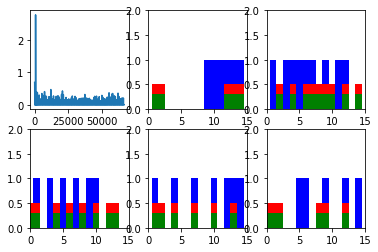

In [34]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()